# Beach Widths

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


## Beach Profiles:

### Manual (Visual) RTK Profile Take-Offs:

In [4]:
the_path = '/Users/parisp15/OneDrive - East Carolina University/Projects/USCRP_Pea_Island_2020_2021/data/beach_profiles/'
plot_path = '../Final_Plots/'

the_first_data_file = 'bch_profiles_2016_2020.csv'
the_second_data_file = 'bch_profiles_2016_2020_II.csv'

In [3]:
dfp1 = pd.read_csv(the_path+the_first_data_file)

dfp1.loc[dfp1['TransectID'].str[0] == 'C', 'Area'] = 'Control'
dfp1.loc[dfp1['TransectID'].str[0] == 'T', 'Area'] = 'Treatment'

year = dfp1['Survey'].str[3:7]
month = dfp1['Survey'].str[0:2]

dfp1['DateG'] = year+'/'+month+'/'+'15'

dfp1['Survey_Date'] = pd.to_datetime(dfp1['DateG'])
dfp1['DateJ'] = pd.DatetimeIndex(dfp1['Survey_Date']).floor('d').to_julian_date()+0.5

dfp1

,Survey,TransectID,Swash_Zone_Slope,beach_slope,beach_width,Swash_Elev,DuneToe_Elev,Area,DateG,Survey_Date,DateJ
0,04_2012,C11,0.000,0.000,0.000,0.000,0.000,Control,2012/04/15,2012-04-15,2456033.0
1,07_2012,C11,0.000,0.000,0.000,0.000,0.000,Control,2012/07/15,2012-07-15,2456124.0
2,10_2012,C11,0.000,0.000,0.000,0.000,0.000,Control,2012/10/15,2012-10-15,2456216.0
3,04_2013,C11,0.000,0.000,0.000,0.000,0.000,Control,2013/04/15,2013-04-15,2456398.0
4,07_2013,C11,0.000,0.000,0.000,0.000,0.000,Control,2013/07/15,2013-07-15,2456489.0
...,...,...,...,...,...,...,...,...,...,...,...
318,10_2020,T12,5.214,5.777,25.850,0.832,3.383,Treatment,2020/10/15,2020-10-15,2459138.0
319,10_2020,T13,9.683,4.945,23.896,1.107,3.688,Treatment,2020/10/15,2020-10-15,2459138.0
320,10_2020,T14,6.704,6.598,31.786,-0.262,3.427,Treatment,2020/10/15,2020-10-15,2459138.0
321,10_2020,T15,8.422,8.427,12.161,-0.359,1.449,Treatment,2020/10/15,2020-10-15,2459138.0


In [40]:
xticcoords_1 = dfp1['DateJ'].unique()  #[2456019., 2456110., 2456202., 2456384., 2456475., 2456567.,
#       2456749., 2456840., 2456902., 2456932., 2457114., 2457205.,
#       2457236., 2457297., 2457480., 2457510., 2457571., 2457602.,
#       2457663., 2457845., 2457967., 2458028., 2458210., 2458332., 2458393.,
#       2458605., 2458666., 2458758., 2458941., 2459032., 2459124.]

xticlabels_1 = dfp1['Survey'].unique() #'2012_04', '2012_07', '2012_10', '2013_04', '2013_07', '2013_10',
#       '2014_04', '2014_07', '2014_09', '2014_10', '2015_04', '2015_07',
#       '2015_08', '2015_10', '2016_04', '2016_05', '2016_07', '2016_08',
#       '2016_10', '2017_04', '2017_08', '2017_10', '2018_04', '2018_08', '2018_10',
#       '2019_05', '2019_07', '2019_10', '2020_04', '2020_07', '2020_10']



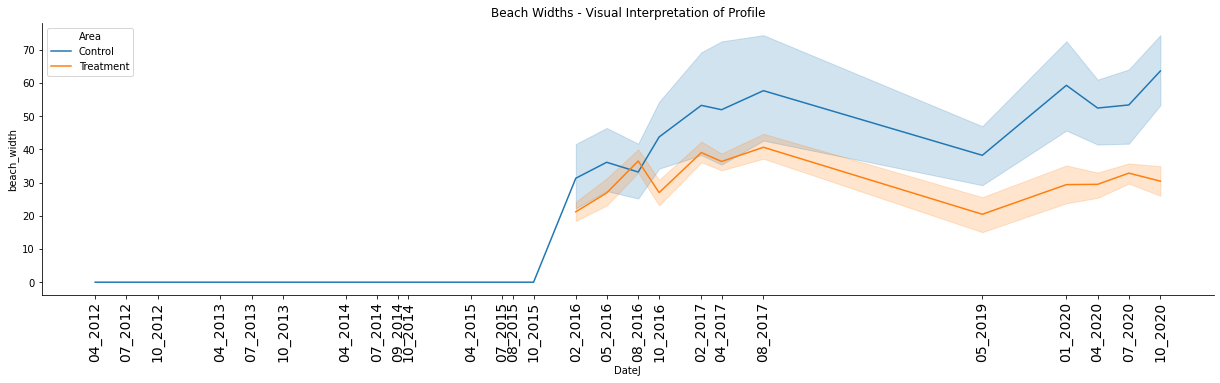

In [41]:
fig = plt.figure(figsize=(21,5))
ax01 = fig.add_subplot(1,1,1)

sns.lineplot(x='DateJ',y='beach_width', hue='Area', data=dfp1, ax=ax01)

ax01.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(xticcoords_1))
ax01.xaxis.set_major_formatter(matplotlib.ticker.FixedFormatter(xticlabels_1))

sns.despine(right=True)

plt.xticks(rotation=90, fontsize=14)
plt.title('Beach Widths - Visual Interpretation of Profile')

plt.xticks(rotation=90);

### Auto RTK Take-Offs:

In [39]:
dfp2 = pd.read_csv(the_path+the_second_data_file)

dfp2.loc[dfp2['TransectID'].str[0] == 'C', 'Area'] = 'Control'
dfp2.loc[dfp2['TransectID'].str[0] == 'T', 'Area'] = 'Treatment'

year = dfp2['Survey'].str[3:7]
month = dfp2['Survey'].str[0:2]

dfp2['DateG'] = year+'/'+month+'/'+'15'

dfp2['Survey_Date'] = pd.to_datetime(dfp2['DateG'])
dfp2['DateJ'] = pd.DatetimeIndex(dfp2['Survey_Date']).floor('d').to_julian_date()+0.5

xticcoords_2 = dfp2['DateJ'].unique()
xticlabels_2 = dfp2['Survey'].unique()

dfp2

,Survey,TransectID,Swash_Zone_Slope,beach_slope,beach_width,Area,DateG,Survey_Date,DateJ
0,02_2016,C11,1.432,2.569,64.294,Control,2016/02/15,2016-02-15,2457434.0
1,02_2016,C10,1.776,2.814,57.029,Control,2016/02/15,2016-02-15,2457434.0
2,02_2016,C09,2.292,4.070,31.926,Control,2016/02/15,2016-02-15,2457434.0
3,02_2016,C08,5.615,7.094,14.877,Control,2016/02/15,2016-02-15,2457434.0
4,02_2016,C07,2.693,6.127,9.071,Control,2016/02/15,2016-02-15,2457434.0
...,...,...,...,...,...,...,...,...,...
289,10_2020,T12,5.214,6.351,31.540,Treatment,2020/10/15,2020-10-15,2459138.0
290,10_2020,T13,9.683,5.561,29.891,Treatment,2020/10/15,2020-10-15,2459138.0
291,10_2020,T14,6.704,6.598,31.786,Treatment,2020/10/15,2020-10-15,2459138.0
292,10_2020,T15,8.422,9.045,17.965,Treatment,2020/10/15,2020-10-15,2459138.0


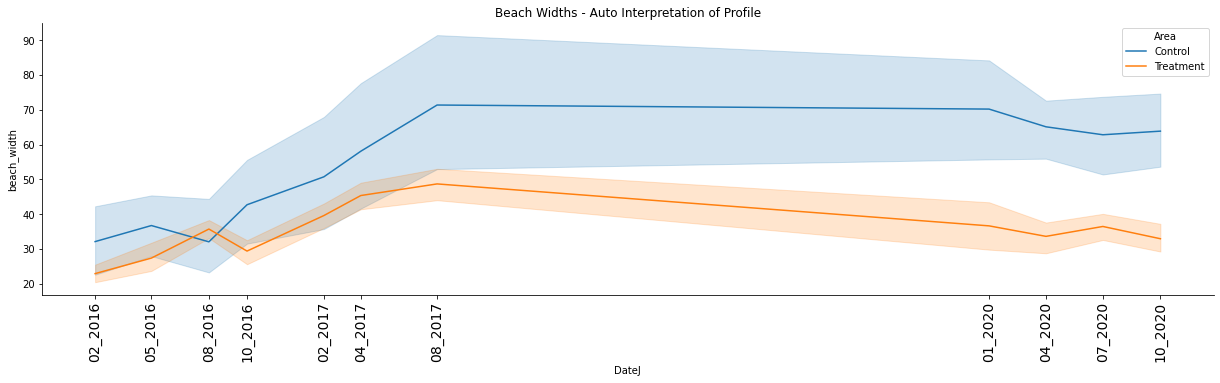

In [43]:
fig = plt.figure(figsize=(21,5))
ax01 = fig.add_subplot(1,1,1)

sns.lineplot(x='DateJ',y='beach_width', hue='Area', data=dfp2, ax=ax01)

ax01.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(xticcoords_2))
ax01.xaxis.set_major_formatter(matplotlib.ticker.FixedFormatter(xticlabels_2))

sns.despine(right=True)

plt.xticks(rotation=90, fontsize=14)
plt.title('Beach Widths - Auto Interpretation of Profile')

plt.xticks(rotation=90);

## Photo-Derived Beach Width Distances:

Generated via heads-up digitized shoreline widths. Guidance, NCDOT aerial photographs, 2012 - 2020

In [6]:
d_path = '/Users/parisp15/OneDrive - East Carolina University/Projects/USCRP_Pea_Island_2020_2021/data/beach_profiles/beach_profile_set_wetdry/csv_files/'
f = 'beach_width_obs.csv'


dfw = pd.read_csv(d_path+f)

dfw['Survey_Datetime'] = pd.to_datetime(dfw['Survey_Date'])

# add Survey column
month =dfw['Survey_Date'].str[0:2]
year = dfw['Survey_Date'].str[6:10]
dfw['Survey'] = year+'_'+month

# add Area column
dfw.loc[dfw['TransectID'].str[0] == 'C', 'Area' ] = 'Control'
dfw.loc[dfw['TransectID'].str[0] == 'T', 'Area'] = 'Treatment'

# add Julian Date, and add 0.5 to bring date to whole day (Julian dates start counting at mid-day)
dfw['DateJ'] = pd.DatetimeIndex(dfw['Survey_Datetime']).floor('d').to_julian_date()+0.5

# build xtic coordinates from Julian Dates and map new xtic labels from Survey column
xtic_coords = dfw['DateJ'].unique()
xtic_lbls = dfw['Survey'].unique()

# dfw

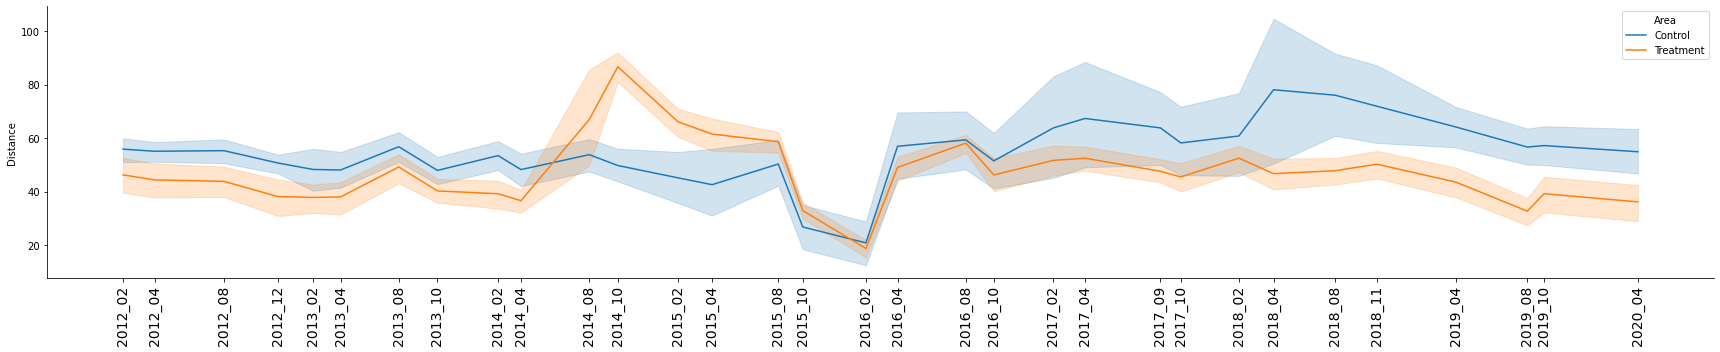

In [7]:
fig02 = plt.figure(figsize=(24,5))
ax01 = fig02.add_subplot(1,1,1)

sns.lineplot(x='DateJ',y='Distance', hue='Area', data=dfw, ax=ax01)

ax01.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(xtic_coords))
ax01.xaxis.set_major_formatter(matplotlib.ticker.FixedFormatter(xtic_lbls))

sns.despine(right=True)

plt.xticks(rotation=90, fontsize=14)
ax01.set_xlabel('')

plt.tight_layout()
plt.savefig(plot_path+'BeachWidth_Line.png');